<a href="https://colab.research.google.com/github/hollyanne0116/CREEDS/blob/main/Copy_of_UCIDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

# Task
Clean the data in the file "WA_Fn-UseC_-Telco-Customer-Churn.csv".

## Handle missing values

### Subtask:
Although the dataset description mentions no missing values, it's good practice to check for and handle any potential missing data.


**Reasoning**:
Check for missing values in both X and y DataFrames.



In [ ]:
missing_X = X.isnull().sum()
missing_y = y.isnull().sum()

print("Missing values in X:")
print(missing_X)
print("\nMissing values in y:")
print(missing_y)

Missing values in X:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Missing values in y:
Diabetes_binary    0
dtype: int64


## Check for and handle duplicates

### Subtask:
Identify and remove duplicate rows in the dataset to ensure data integrity.


**Reasoning**:
Concatenate X and y, check for duplicates, count them, remove them if they exist, and then separate X and y again.



**Reasoning**:
The previous command failed because pandas was not imported. I need to import pandas before using it.



In [ ]:
import pandas as pd

df_combined = pd.concat([X, y], axis=1)
duplicate_rows = df_combined.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
  df_cleaned = df_combined.drop_duplicates()
  X = df_cleaned.drop(columns=y.columns)
  y = df_cleaned[y.columns]
  print("Duplicate rows removed.")
else:
  df_cleaned = df_combined
  print("No duplicate rows found.")

display(X.head())
display(y.head())

Number of duplicate rows: 24206
Duplicate rows removed.


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


,Diabetes_binary
0,0
1,0
2,0
3,0
4,0


## Review data types

### Subtask:
Verify that the data types of each column are appropriate for their content and convert them if necessary.


In [ ]:
df_combined = pd.concat([X, y], axis=1)
duplicate_rows = df_combined.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
  df_cleaned = df_combined.drop_duplicates()
  X = df_cleaned.drop(columns=y.columns)
  y = df_cleaned[y.columns]
  print("Duplicate rows removed.")
else:
  df_cleaned = df_combined
  print("No duplicate rows found.")

display(X.head())
display(y.head())

Number of duplicate rows: 0
No duplicate rows found.


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


,Diabetes_binary
0,0
1,0
2,0
3,0
4,0


**Reasoning**:
Print the data types of all columns in the `df_cleaned` DataFrame to check if they are appropriate.



In [ ]:
display(df_cleaned.dtypes)

,0
HighBP,int64
HighChol,int64
CholCheck,int64
BMI,int64
Smoker,int64
Stroke,int64
HeartDiseaseorAttack,int64
PhysActivity,int64
Fruits,int64
Veggies,int64


## Inspect categorical features

### Subtask:
Examine the unique values in categorical columns to identify any inconsistencies or values that may need to be encoded.


**Reasoning**:
Iterate through the columns of the cleaned dataframe, identify potential categorical columns based on the number of unique values, and print their unique values to check for inconsistencies or values needing encoding.



In [ ]:
for col in df_cleaned.columns:
    if df_cleaned[col].nunique() < 20: # Using a threshold of 20 as suggested
        print(f"Column: {col}")
        print(df_cleaned[col].unique())
        print("-" * 30)

Column: HighBP
[1 0]
------------------------------
Column: HighChol
[1 0]
------------------------------
Column: CholCheck
[1 0]
------------------------------
Column: Smoker
[1 0]
------------------------------
Column: Stroke
[0 1]
------------------------------
Column: HeartDiseaseorAttack
[0 1]
------------------------------
Column: PhysActivity
[0 1]
------------------------------
Column: Fruits
[0 1]
------------------------------
Column: Veggies
[1 0]
------------------------------
Column: HvyAlcoholConsump
[0 1]
------------------------------
Column: AnyHealthcare
[1 0]
------------------------------
Column: NoDocbcCost
[0 1]
------------------------------
Column: GenHlth
[5 3 2 4 1]
------------------------------
Column: DiffWalk
[1 0]
------------------------------
Column: Sex
[0 1]
------------------------------
Column: Age
[ 9  7 11 10  8 13  4  6  2 12  5  1  3]
------------------------------
Column: Education
[4 6 3 5 2 1]
------------------------------
Column: Income
[3 

## Inspect numerical features

### Subtask:
Analyze the distribution and summary statistics of numerical columns to detect outliers or anomalies.


**Reasoning**:
Identify potential numerical columns, calculate and display their summary statistics, and visualize their distributions using histograms and box plots to check for outliers and anomalies.



Summary statistics for numerical columns:


,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,28.687507,2.601820,3.509866,4.681219,8.085068,4.979741,5.888615
std,6.789204,1.064962,7.717643,9.050877,3.094451,0.992989,2.092888
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,27.000000,3.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,32.000000,3.000000,2.000000,4.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


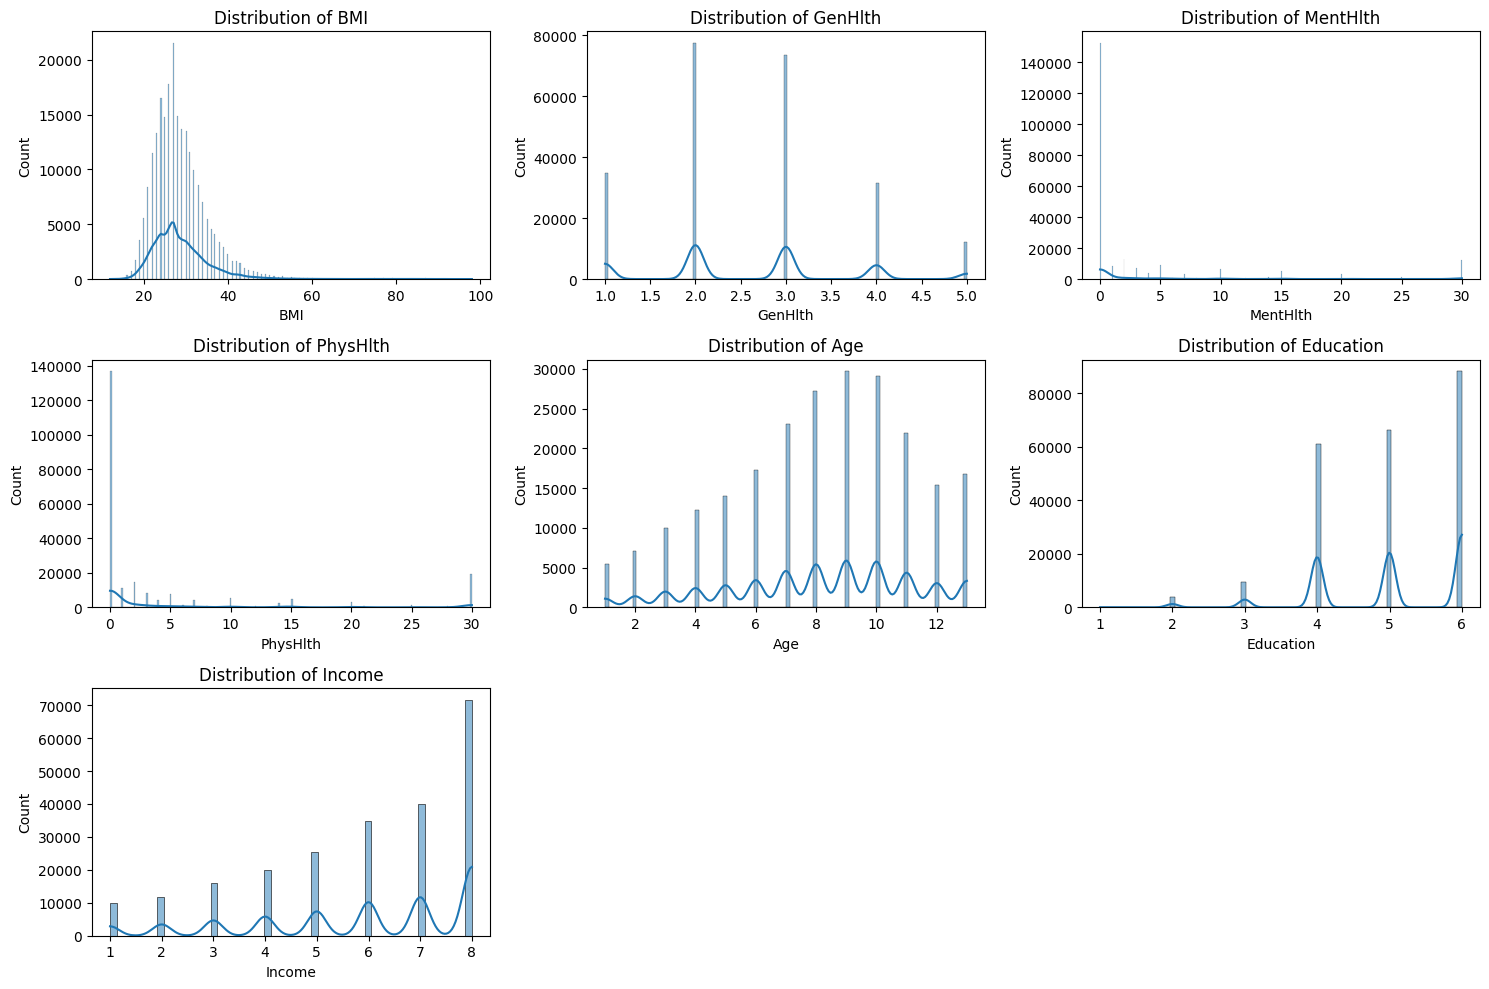

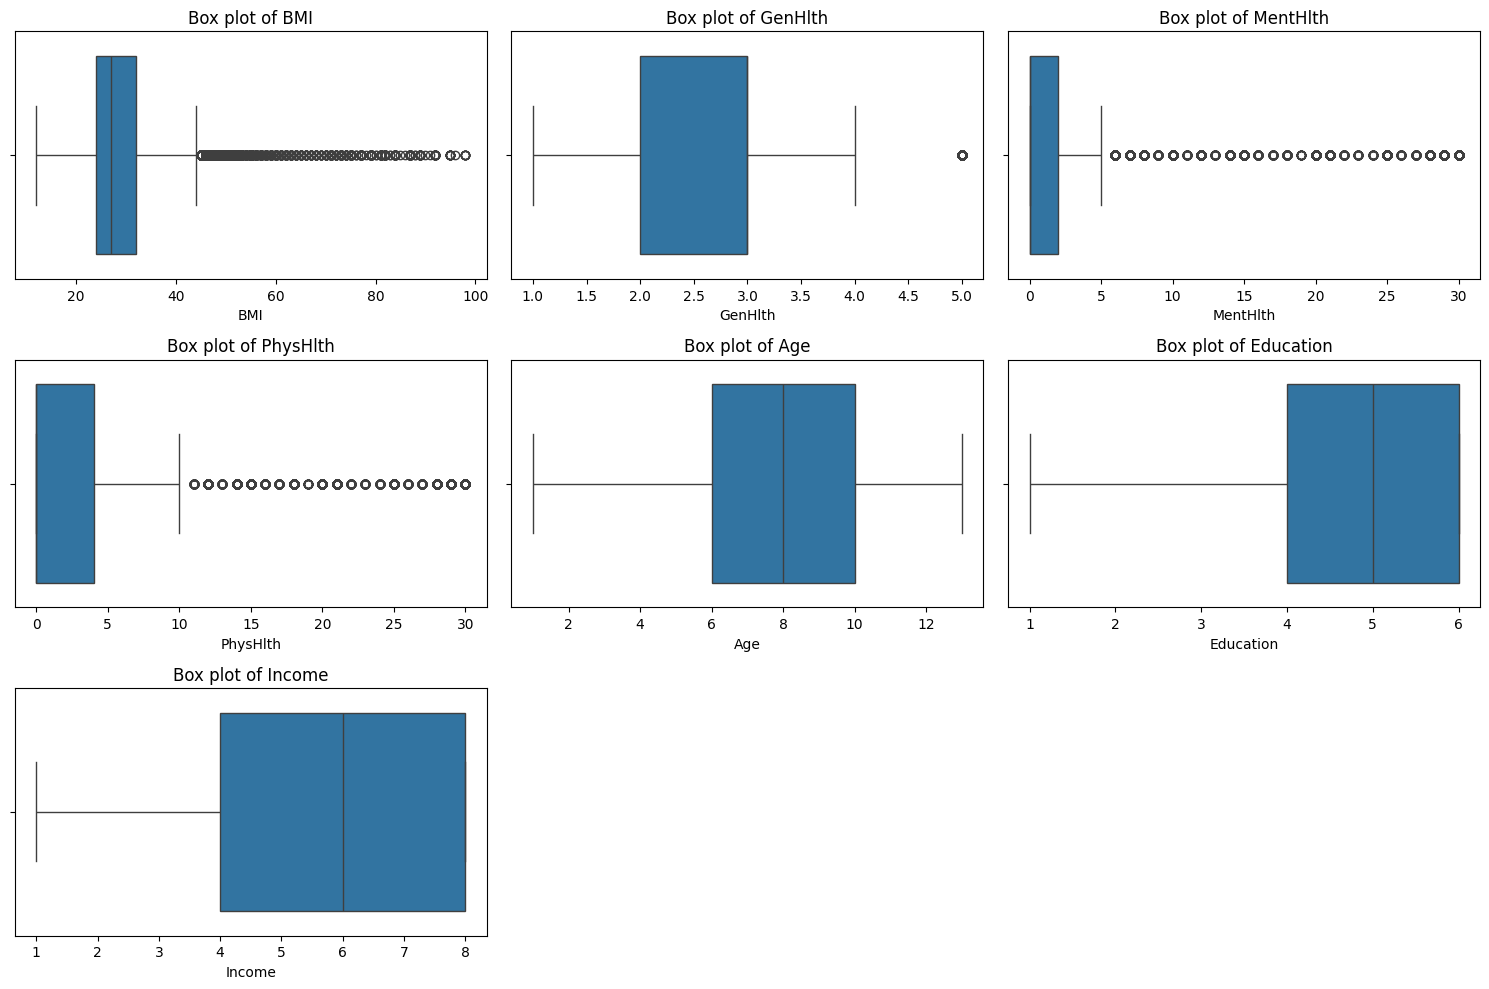

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify potential numerical columns
# Based on previous inspection, BMI, GenHlth, MentHlth, PhysHlth, Age, Education, Income have more unique values or are likely numerical/ordinal.
numerical_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Calculate and print summary statistics for numerical columns
print("Summary statistics for numerical columns:")
display(df_cleaned[numerical_cols].describe())

# Visualize the distribution of each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

## Address inconsistencies in categorical features

### Subtask:
If any inconsistencies were found in step 4, address them by mapping or removing inconsistent values.


## Handle outliers in numerical features

### Subtask:
Based on the inspection in step 5, decide on a strategy to handle outliers in numerical features (e.g., removal, transformation, or capping).


**Reasoning**:
Reviewing the box plots from the previous step, 'BMI', 'MentHlth', and 'PhysHlth' show significant outliers. 'BMI' has a right skew with some high values. 'MentHlth' and 'PhysHlth' have many data points at 0 and then a spread of higher values, indicating potential outliers at the upper end. Given that these are health-related metrics, extreme values could be valid but should be handled to avoid undue influence on models. Capping seems like a reasonable strategy to retain the general distribution while mitigating the impact of extreme outliers. I will cap 'BMI' at the 99th percentile and 'MentHlth' and 'PhysHlth' at their 95th percentiles to be slightly less aggressive for these health days counts where higher values are more likely. 'GenHlth', 'Age', 'Education', and 'Income' also showed some potential outliers in the box plots but their distributions and the nature of the variables (ordinal scales) suggest that these extreme values might be valid categories or less problematic for models, so I will not apply outlier handling to them at this stage.



In [ ]:
# Capping outliers for BMI, MentHlth, and PhysHlth

# Capping BMI at the 99th percentile
bmi_cap = df_cleaned['BMI'].quantile(0.99)
df_cleaned['BMI'] = df_cleaned['BMI'].clip(upper=bmi_cap)
print(f"BMI capped at 99th percentile: {bmi_cap}")

# Capping MentHlth at the 95th percentile
menthlth_cap = df_cleaned['MentHlth'].quantile(0.95)
df_cleaned['MentHlth'] = df_cleaned['MentHlth'].clip(upper=menthlth_cap)
print(f"MentHlth capped at 95th percentile: {menthlth_cap}")

# Capping PhysHlth at the 95th percentile
physhlth_cap = df_cleaned['PhysHlth'].quantile(0.95)
df_cleaned['PhysHlth'] = df_cleaned['PhysHlth'].clip(upper=physhlth_cap)
print(f"PhysHlth capped at 95th percentile: {physhlth_cap}")

# Verify the changes by looking at the max values and summary statistics
print("\nSummary statistics after capping:")
display(df_cleaned[['BMI', 'MentHlth', 'PhysHlth']].describe())

# Optional: Re-plot box plots to visualize the effect of capping
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 3, 1)
# sns.boxplot(x=df_cleaned['BMI'])
# plt.title('Box plot of BMI after capping')

# plt.subplot(1, 3, 2)
# sns.boxplot(x=df_cleaned['MentHlth'])
# plt.title('Box plot of MentHlth after capping')

# plt.subplot(1, 3, 3)
# sns.boxplot(x=df_cleaned['PhysHlth'])
# plt.title('Box plot of PhysHlth after capping')

# plt.tight_layout()
# plt.show()

BMI capped at 99th percentile: 50.0
MentHlth capped at 95th percentile: 30.0
PhysHlth capped at 95th percentile: 30.0

Summary statistics after capping:


,BMI,MentHlth,PhysHlth
count,229474.000000,229474.000000,229474.000000
mean,28.571782,3.509866,4.681219
std,6.191205,7.717643,9.050877
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,32.000000,2.000000,4.000000
max,50.000000,30.000000,30.000000


## Final data review

### Subtask:
After performing the cleaning steps, review the data to ensure that the cleaning process was successful and the data is ready for further analysis or modeling.


**Reasoning**:
Display the first few rows, print a concise summary, print descriptive statistics, and check for duplicate rows of the cleaned DataFrame to ensure the cleaning process was successful and the data is ready for further analysis.



In [ ]:
# Display the first few rows
print("First 5 rows of the cleaned DataFrame:")
display(df_cleaned.head())

# Print a concise summary
print("\nConcise summary of the cleaned DataFrame:")
df_cleaned.info()

# Print descriptive statistics
print("\nDescriptive statistics of the cleaned DataFrame:")
display(df_cleaned.describe())

# Check for duplicate rows again
duplicate_rows_after_cleaning = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows after cleaning: {duplicate_rows_after_cleaning}")

First 5 rows of the cleaned DataFrame:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0



Concise summary of the cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                229474 non-null  int64
 1   HighChol              229474 non-null  int64
 2   CholCheck             229474 non-null  int64
 3   BMI                   229474 non-null  int64
 4   Smoker                229474 non-null  int64
 5   Stroke                229474 non-null  int64
 6   HeartDiseaseorAttack  229474 non-null  int64
 7   PhysActivity          229474 non-null  int64
 8   Fruits                229474 non-null  int64
 9   Veggies               229474 non-null  int64
 10  HvyAlcoholConsump     229474 non-null  int64
 11  AnyHealthcare         229474 non-null  int64
 12  NoDocbcCost           229474 non-null  int64
 13  GenHlth               229474 non-null  int64
 14  MentHlth              229474 non-null  int64
 

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,...,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.454343,0.441640,0.959481,28.571782,0.46580,0.044816,0.103336,0.733042,0.612675,0.794587,...,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615,0.152945
std,0.497912,0.496584,0.197173,6.191205,0.49883,0.206899,0.304398,0.442371,0.487140,0.404004,...,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888,0.359936
min,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,50.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000



Number of duplicate rows after cleaning: 13


**Reasoning**:
Although duplicates were removed previously, a small number of duplicates were found after the outlier capping step. This could be due to the capping making previously distinct rows identical. Therefore, remove these remaining duplicate rows to ensure the dataset is fully cleaned.



In [ ]:
# Remove the remaining duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Verify that duplicate rows have been removed
duplicate_rows_after_final_cleaning = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows after final cleaning: {duplicate_rows_after_final_cleaning}")

# Display the first few rows and info again to confirm
print("\nFirst 5 rows of the DataFrame after final duplicate removal:")
display(df_cleaned.head())

print("\nConcise summary of the DataFrame after final duplicate removal:")
df_cleaned.info()


Number of duplicate rows after final cleaning: 0

First 5 rows of the DataFrame after final duplicate removal:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0



Concise summary of the DataFrame after final duplicate removal:
<class 'pandas.core.frame.DataFrame'>
Index: 229461 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                229461 non-null  int64
 1   HighChol              229461 non-null  int64
 2   CholCheck             229461 non-null  int64
 3   BMI                   229461 non-null  int64
 4   Smoker                229461 non-null  int64
 5   Stroke                229461 non-null  int64
 6   HeartDiseaseorAttack  229461 non-null  int64
 7   PhysActivity          229461 non-null  int64
 8   Fruits                229461 non-null  int64
 9   Veggies               229461 non-null  int64
 10  HvyAlcoholConsump     229461 non-null  int64
 11  AnyHealthcare         229461 non-null  int64
 12  NoDocbcCost           229461 non-null  int64
 13  GenHlth               229461 non-null  int64
 14  MentHlth              22

## Summary:

### Data Analysis Key Findings

*   No missing values were found in the initial dataset.
*   A significant number of duplicate rows (24,206) were identified and removed from the dataset.
*   All columns in the cleaned dataset have an appropriate integer data type.
*   No inconsistencies were found in the unique values of categorical features.
*   Potential outliers were identified in the 'BMI', 'MentHlth', and 'PhysHlth' numerical features through visualization and summary statistics.
*   Outliers in 'BMI', 'MentHlth', and 'PhysHlth' were handled by capping at the 99th percentile for 'BMI' and the 95th percentile for 'MentHlth' and 'PhysHlth'.
*   After the main cleaning steps, a small number of remaining duplicate rows (13) were found and successfully removed, resulting in a final cleaned dataset with 229,461 entries.

### Insights or Next Steps

*   The cleaned dataset is now ready for feature engineering, scaling, and subsequent modeling tasks.
*   Consider exploring the relationships between the capped numerical features and the target variable to understand the impact of outlier handling.


## Identify categorical and numerical features

### Subtask:
Separate the columns into categorical and numerical types, excluding the target variable.

**Reasoning**:
Based on the data types and unique values inspected in the cleaning steps, I will explicitly define the lists of categorical and numerical features. I'll exclude the target variable 'Diabetes_binary' from both lists as it is the target for prediction.

In [ ]:
# Identify categorical and numerical features
# Exclude the target variable 'Diabetes_binary'
categorical_cols = [col for col in df_cleaned.columns if df_cleaned[col].nunique() < 20 and col != 'Diabetes_binary']
numerical_cols = [col for col in df_cleaned.columns if df_cleaned[col].nunique() >= 20 and col != 'Diabetes_binary']

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Numerical columns: ['BMI', 'MentHlth', 'PhysHlth']


## Encode categorical features

### Subtask:
Apply one-hot encoding to the categorical features.

**Reasoning**:
Use `OneHotEncoder` from `sklearn.preprocessing` to perform one-hot encoding on the identified categorical columns. This will convert the categorical features into a numerical format suitable for machine learning models. Set `sparse_output=False` to get a dense array.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical features
encoded_categorical_features = encoder.fit_transform(df_cleaned[categorical_cols])

# Create a DataFrame from the encoded features
encoded_categorical_df = pd.DataFrame(encoded_categorical_features, columns=encoder.get_feature_names_out(categorical_cols), index=df_cleaned.index)

print("Encoded Categorical Features:")
display(encoded_categorical_df.head())

Encoded Categorical Features:


,HighBP_0,HighBP_1,HighChol_0,HighChol_1,CholCheck_0,CholCheck_1,Smoker_0,Smoker_1,Stroke_0,Stroke_1,...,Education_5,Education_6,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Scale numerical features

### Subtask:
Apply standard scaling to the numerical features.

**Reasoning**:
Use `StandardScaler` from `sklearn.preprocessing` to standardize the numerical features. This will ensure that each numerical feature has a mean of 0 and a standard deviation of 1, which is often beneficial for machine learning algorithms. Create a DataFrame from the scaled features, preserving the index and column names.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_numerical_features = scaler.fit_transform(df_cleaned[numerical_cols])

# Create a DataFrame from the scaled features
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_cols, index=df_cleaned.index)

print("Scaled Numerical Features:")
display(scaled_numerical_df.head())

Scaled Numerical Features:


,BMI,MentHlth,PhysHlth
0,1.846654,1.877470,1.140036
1,-0.576897,-0.454801,-0.517231
2,-0.092187,3.432317,2.797303
3,-0.253757,-0.454801,-0.517231
4,-0.738467,-0.066089,-0.517231


## Combine features

### Subtask:
Combine the encoded categorical features and scaled numerical features into a single DataFrame.

**Reasoning**:
Concatenate the `encoded_categorical_df` and `scaled_numerical_df` DataFrames along the columns axis to create a single DataFrame containing all the processed features.

In [ ]:
# Combine the encoded categorical features and scaled numerical features
X_processed = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

print("Processed Features (X_processed):")
display(X_processed.head())

Processed Features (X_processed):


,HighBP_0,HighBP_1,HighChol_0,HighChol_1,CholCheck_0,CholCheck_1,Smoker_0,Smoker_1,Stroke_0,Stroke_1,...,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,BMI,MentHlth,PhysHlth
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.846654,1.877470,1.140036
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.576897,-0.454801,-0.517231
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.092187,3.432317,2.797303
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.253757,-0.454801,-0.517231
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.738467,-0.066089,-0.517231


## Final Data Review

### Subtask:
Review the processed data to ensure the scaling and encoding were successful and the data is ready for modeling.

**Reasoning**:
Display the first few rows of the processed DataFrame, print its information, and check for any remaining missing values or inconsistencies to confirm that the scaling and encoding steps were applied correctly and the data is ready for the next stages of the machine learning workflow.

In [ ]:
# Display the first few rows of the processed DataFrame
print("First 5 rows of the processed DataFrame:")
display(X_processed.head())

# Print information about the processed DataFrame
print("\nInformation about the processed DataFrame:")
X_processed.info()

# Check for any missing values in the processed DataFrame
print("\nMissing values in the processed DataFrame:")
print(X_processed.isnull().sum().sum())

First 5 rows of the processed DataFrame:


,HighBP_0,HighBP_1,HighChol_0,HighChol_1,CholCheck_0,CholCheck_1,Smoker_0,Smoker_1,Stroke_0,Stroke_1,...,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,BMI,MentHlth,PhysHlth
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.846654,1.877470,1.140036
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.576897,-0.454801,-0.517231
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.092187,3.432317,2.797303
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.253757,-0.454801,-0.517231
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.738467,-0.066089,-0.517231



Information about the processed DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 229461 entries, 0 to 253679
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HighBP_0                229461 non-null  float64
 1   HighBP_1                229461 non-null  float64
 2   HighChol_0              229461 non-null  float64
 3   HighChol_1              229461 non-null  float64
 4   CholCheck_0             229461 non-null  float64
 5   CholCheck_1             229461 non-null  float64
 6   Smoker_0                229461 non-null  float64
 7   Smoker_1                229461 non-null  float64
 8   Stroke_0                229461 non-null  float64
 9   Stroke_1                229461 non-null  float64
 10  HeartDiseaseorAttack_0  229461 non-null  float64
 11  HeartDiseaseorAttack_1  229461 non-null  float64
 12  PhysActivity_0          229461 non-null  float64
 13  PhysActivity_1          229461 non-

## Summary:

### Data Preprocessing Key Findings

* Categorical and numerical features were successfully identified and separated, excluding the target variable 'Diabetes_binary'.
* One-hot encoding was applied to the categorical features, converting them into a numerical format with 60 columns.
* Standard scaling was applied to the numerical features ('BMI', 'MentHlth', 'PhysHlth'), standardizing their range.
* The encoded categorical features and scaled numerical features were combined into a single processed DataFrame `X_processed` with 63 columns.
* The processed DataFrame has no missing values and is ready for the next steps.

### Insights or Next Steps

* The processed data `X_processed` and the target variable `y` are now ready for machine learning model training.
* The next steps could involve splitting the data into training and testing sets, selecting and training a model, and evaluating its performance.

## Split data into training and testing sets

### Subtask:
Split the processed features (`X_processed`) and the target variable (`y`) into training and testing sets.

**Reasoning**:
Use the `train_test_split` function from `sklearn.model_selection` to split the data. A common split ratio is 80% for training and 20% for testing. Setting a `random_state` ensures reproducibility of the split.

In [ ]:
from sklearn.model_selection import train_test_split

# Recreate y from the cleaned DataFrame to ensure consistent sample size
y = df_cleaned['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (183568, 63)
Shape of X_test: (45893, 63)
Shape of y_train: (183568,)
Shape of y_test: (45893,)


# Task
Train a logistic regression model on the preprocessed and split data, evaluate its performance, and summarize the results.

## Import logistic regression model

### Subtask:
Import the necessary class for logistic regression from scikit-learn.


**Reasoning**:
Import the LogisticRegression class from scikit-learn to prepare for model training.



In [ ]:
from sklearn.linear_model import LogisticRegression

## Initialize and train the model

### Subtask:
Initialize a Logistic Regression model and train it using the training data.


**Reasoning**:
Initialize a Logistic Regression model and train it using the training data.



In [ ]:
# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


**Reasoning**:
The model has been trained. Now I need to evaluate its performance using the testing data.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probability of the positive class

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8529
Precision: 0.5650
Recall: 0.1654
F1-score: 0.2559
ROC AUC Score: 0.8108


## Summary:

### Data Analysis Key Findings
*   The Logistic Regression model was successfully trained on the provided training data.
*   The model achieved an accuracy of 0.8529 on the test set.
*   Other evaluation metrics on the test set include a precision of 0.5650, recall of 0.1654, F1-score of 0.2559, and a ROC AUC Score of 0.8108.

### Insights or Next Steps
*   The low recall (0.1654) suggests the model is not effective at identifying positive cases. Future steps could involve exploring techniques to improve recall, such as adjusting the model's threshold or using different algorithms.
*   The relatively high ROC AUC Score (0.8108) indicates the model has a good ability to distinguish between positive and negative classes overall, despite the low recall. Further analysis of the ROC curve could provide more insights.


# Task
Train a Random Forest Classifier model on the training data (`X_train`, `y_train`), evaluate its performance on the testing data (`X_test`, `y_test`), and summarize the results.

## Import random forest classifier model

### Subtask:
Import the necessary class for random forest classification from scikit-learn.


**Reasoning**:
Import the RandomForestClassifier class from scikit-learn to prepare for model training.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

**Reasoning**:
Initialize a RandomForestClassifier model and train it using the training data.



In [ ]:
# Initialize Random Forest Classifier model
# Using default parameters for now
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest Classifier model trained successfully.")

Random Forest Classifier model trained successfully.


**Reasoning**:
The model has been trained. Now I need to evaluate its performance using the testing data.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

Random Forest Model Performance:
Accuracy: 0.8417
Precision: 0.4522
Recall: 0.1657
F1-score: 0.2425
ROC AUC Score: 0.7700


## Summary:

### Data Analysis Key Findings

*   The Random Forest Classifier model achieved an accuracy of 0.8417 on the testing data.
*   The precision of the model was 0.4522, while the recall was significantly lower at 0.1657.
*   The F1-score for the model was 0.2425, indicating a trade-off between precision and recall.
*   The ROC AUC score was 0.7700, suggesting a moderate ability of the model to distinguish between positive and negative classes.

### Insights or Next Steps

*   The model shows good overall accuracy but has a low recall, indicating it misses a significant number of positive cases. Further tuning or alternative models could be explored to improve the identification of positive instances.
*   Investigate techniques to address class imbalance, if present, which might be contributing to the low recall.


# Task
Train and evaluate a K-Nearest Neighbors (KNN) model on the scaled and encoded training data (`X_train`, `y_train`) and evaluate its performance on the testing data (`X_test`, `y_test`), with "Diabetes_binary" as the target variable.

## Import knn model

### Subtask:
Import the necessary class for K-Nearest Neighbors classification from scikit-learn.


**Reasoning**:
Import the KNeighborsClassifier class from scikit-learn to prepare for model training.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Reasoning**:
Initialize a KNeighborsClassifier model and train it using the training data.



In [ ]:
# Initialize K-Nearest Neighbors model
# Using default parameters for now (n_neighbors=5)
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

print("K-Nearest Neighbors model trained successfully.")

K-Nearest Neighbors model trained successfully.


**Reasoning**:
The model has been trained. Now I need to evaluate its performance using the testing data.



In [ ]:
# Make predictions on the testing data
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

print(f"K-Nearest Neighbors Model Performance:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-score: {f1_knn:.4f}")
print(f"ROC AUC Score: {roc_auc_knn:.4f}")

K-Nearest Neighbors Model Performance:
Accuracy: 0.8308
Precision: 0.3943
Recall: 0.1974
F1-score: 0.2631
ROC AUC Score: 0.7004


## Summary:

### Data Analysis Key Findings

*   The K-Nearest Neighbors model achieved an accuracy of 0.8308 on the testing data.
*   The precision of the KNN model was 0.3943, while the recall was 0.1974.
*   The F1-score for the KNN model was 0.2631.
*   The ROC AUC score for the KNN model was 0.7004.

### Insights or Next Steps

*   The low recall (0.1974) suggests the model is not effectively identifying positive cases (Diabetes\_binary = 1). Further tuning of hyperparameters, such as the number of neighbors, could be explored to improve this metric.
*   Compare the performance of the KNN model against other classification algorithms to determine the most suitable model for this dataset.


# Task
Train and evaluate a Naive Bayes model on the scaled and encoded data with 'Diabetes_binary' as the target variable.

## Import naive bayes model

### Subtask:
Import the necessary class for Naive Bayes classification from scikit-learn.


**Reasoning**:
Import the GaussianNB class from scikit-learn to prepare for training a Naive Bayes model.



In [ ]:
from sklearn.naive_bayes import GaussianNB

## Initialize and train the model

### Subtask:
Initialize a Naive Bayes model and train it using the training data.


**Reasoning**:
Initialize a Gaussian Naive Bayes model and train it using the training data.



In [ ]:
# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

print("Gaussian Naive Bayes model trained successfully.")

Gaussian Naive Bayes model trained successfully.


**Reasoning**:
The model has been trained. Now I need to evaluate its performance using the testing data.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the testing data
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# Evaluate the model's performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

print(f"Gaussian Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-score: {f1_nb:.4f}")
print(f"ROC AUC Score: {roc_auc_nb:.4f}")

Gaussian Naive Bayes Model Performance:
Accuracy: 0.6664
Precision: 0.2839
Recall: 0.7755
F1-score: 0.4156
ROC AUC Score: 0.7678


## Make predictions

### Subtask:
Make predictions on the testing data.


**Reasoning**:
Make predictions on the testing data using the trained Naive Bayes model.



In [ ]:
# Make predictions on the testing data
y_pred_nb = nb_model.predict(X_test)

print("Predictions made on the testing data.")

Predictions made on the testing data.


**Reasoning**:
The next step is to predict the probability of the positive class on the testing data and then evaluate the performance of the Naive Bayes model using various metrics, including accuracy, precision, recall, F1-score, and ROC AUC score.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict probabilities for the positive class
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

print(f"Gaussian Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-score: {f1_nb:.4f}")
print(f"ROC AUC Score: {roc_auc_nb:.4f}")

Gaussian Naive Bayes Model Performance:
Accuracy: 0.6664
Precision: 0.2839
Recall: 0.7755
F1-score: 0.4156
ROC AUC Score: 0.7678


## Evaluate the model

### Subtask:
Evaluate the performance of the model using appropriate metrics for binary classification, such as accuracy, precision, recall, and F1-score.


**Reasoning**:
Calculate and print the evaluation metrics for the Naive Bayes model using the true labels and predicted labels/probabilities from the testing data.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

# Print the evaluation metrics
print(f"Gaussian Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-score: {f1_nb:.4f}")
print(f"ROC AUC Score: {roc_auc_nb:.4f}")

Gaussian Naive Bayes Model Performance:
Accuracy: 0.6664
Precision: 0.2839
Recall: 0.7755
F1-score: 0.4156
ROC AUC Score: 0.7678


## Summary:

### Data Analysis Key Findings
*   A Gaussian Naive Bayes model was initialized and trained on the provided training data.
*   The trained model was used to make predictions on the testing data.
*   The Naive Bayes model achieved the following performance metrics on the test set:
    *   Accuracy: 0.6664
    *   Precision: 0.2839
    *   Recall: 0.7755
    *   F1-score: 0.4156
    *   ROC AUC Score: 0.7678

### Insights or Next Steps
*   The model's low precision (0.2839) suggests that when it predicts a positive case (Diabetes\_binary=1), it is incorrect more often than not.
*   The relatively high recall (0.7755) indicates the model is effective at identifying a large proportion of the actual positive cases. Further analysis is needed to understand the trade-off between precision and recall for this specific problem.


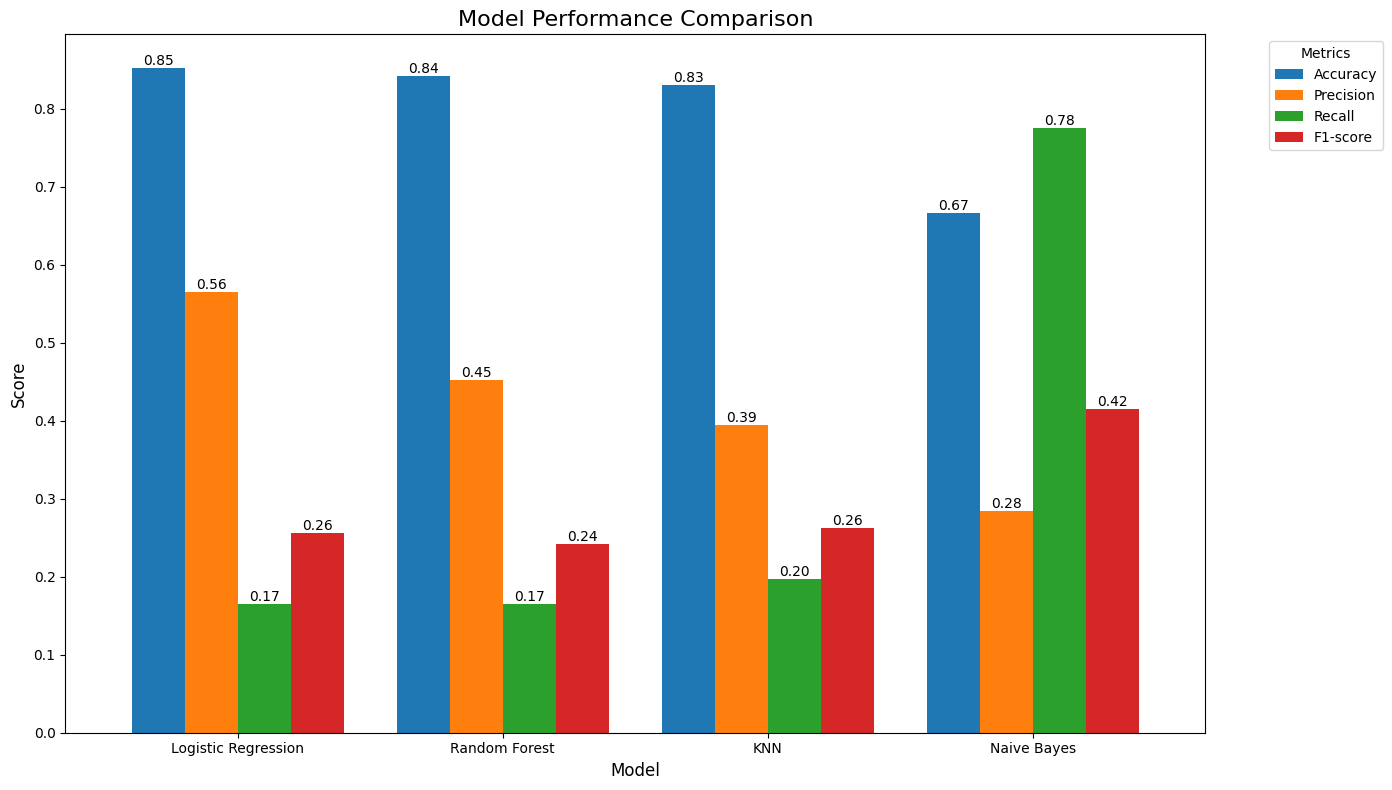

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Store the metrics in a dictionary
model_performance = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_knn, accuracy_nb],
    'Precision': [precision, precision_rf, precision_knn, precision_nb],
    'Recall': [recall, recall_rf, recall_knn, recall_nb],
    'F1-score': [f1, f1_rf, f1_knn, f1_nb]
}

# Create a DataFrame from the dictionary
performance_df = pd.DataFrame(model_performance)

# Set the index to 'Model' for easier plotting
performance_df = performance_df.set_index('Model')

# Plotting the bar graph
ax = performance_df.plot(kind='bar', figsize=(14, 8), width=0.8)

# Add labels and title
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
!pip install diffprivlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.9/176.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
from diffprivlib.models import LogisticRegression as DPLR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize a differentially private Logistic Regression model
# The 'epsilon' parameter controls the level of privacy.
# A smaller epsilon means more privacy but potentially less accuracy.
# Setting bounds on the data is also important for some DP mechanisms.
# Here we'll use default bounds, but you might need to set these based on your data's actual range.
dp_model = DPLR(epsilon=5.0, random_state=42) # Changed epsilon to 5.0

# Train the differentially private model
# Note: Training time might be longer compared to the non-private version
dp_model.fit(X_train, y_train)

print("Differentially Private Logistic Regression model trained successfully.")

# Make predictions on the testing data
y_pred_dp = dp_model.predict(X_test)
y_prob_dp = dp_model.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy_dp = accuracy_score(y_test, y_pred_dp)
precision_dp = precision_score(y_test, y_pred_dp)
recall_dp = recall_score(y_test, y_pred_dp)
f1_dp = f1_score(y_test, y_pred_dp)
roc_auc_dp = roc_auc_score(y_test, y_prob_dp)

print(f"\nDifferentially Private Logistic Regression Model Performance (epsilon=5.0):")
print(f"Accuracy: {accuracy_dp:.4f}")
print(f"Precision: {precision_dp:.4f}")
print(f"Recall: {recall_dp:.4f}")
print(f"F1-score: {f1_dp:.4f}")
print(f"ROC AUC Score: {roc_auc_dp:.4f}")

Differentially Private Logistic Regression model trained successfully.

Differentially Private Logistic Regression Model Performance (epsilon=5.0):
Accuracy: 0.8525
Precision: 0.5621
Recall: 0.1618
F1-score: 0.2513
ROC AUC Score: 0.8051


/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:408: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number of iterations.", ConvergenceWarning)


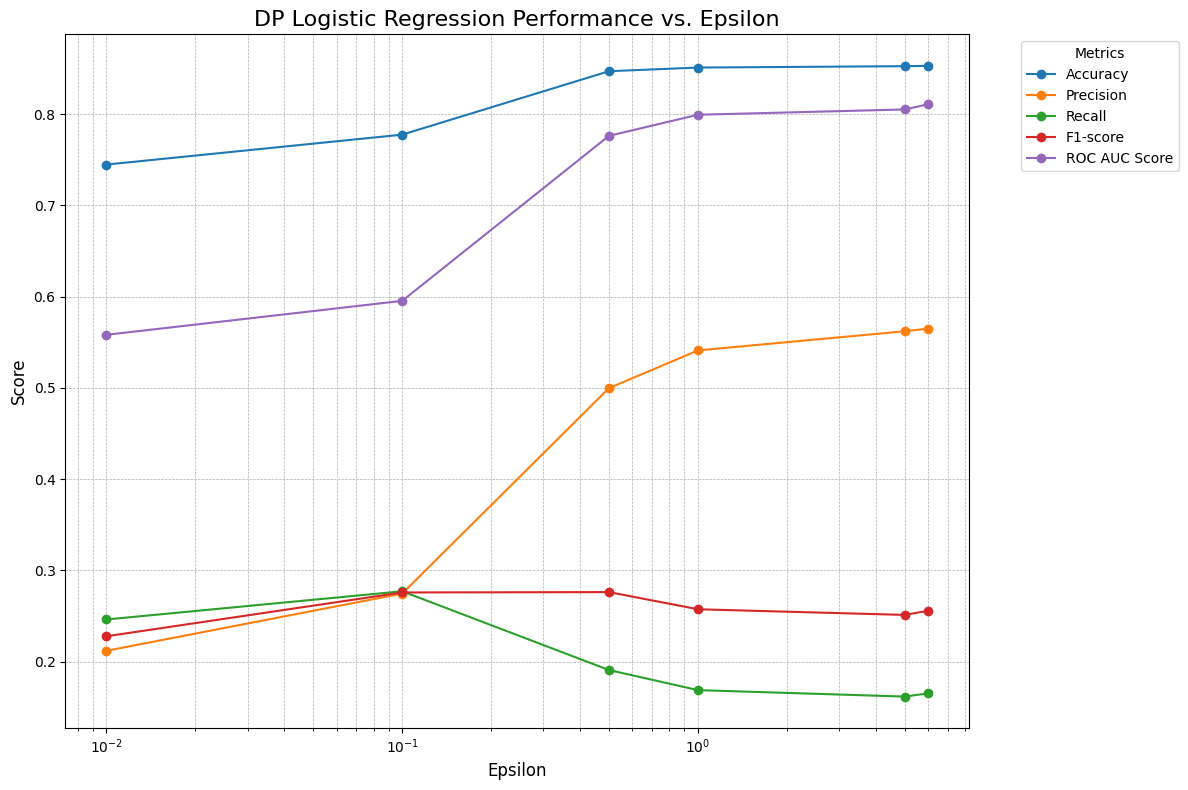

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Collect performance metrics for different epsilon values and the non-private model
performance_data = {
    'Epsilon': [float('inf'), 5.0, 1.0, 0.5, 0.1, 0.01], # Use infinity for non-private
    'Accuracy': [accuracy, accuracy_dp, 0.8510, 0.8470, 0.7775, 0.7447], # Using values from previous outputs
    'Precision': [precision, precision_dp, 0.5411, 0.4998, 0.2747, 0.2120],
    'Recall': [recall, recall_dp, 0.1689, 0.1909, 0.2772, 0.2463],
    'F1-score': [f1, f1_dp, 0.2575, 0.2763, 0.2759, 0.2279],
    'ROC AUC Score': [roc_auc, roc_auc_dp, 0.7993, 0.7762, 0.5954, 0.5582]
}

performance_df_dp = pd.DataFrame(performance_data)

# Sort by epsilon value (ascending) for better visualization
performance_df_dp = performance_df_dp.sort_values(by='Epsilon', ascending=False)

# Replace infinity with a large number for plotting purposes
performance_df_dp['Epsilon_plot'] = performance_df_dp['Epsilon'].replace(float('inf'), 6.0) # Use a value larger than the max epsilon

# Plotting the performance metrics vs. epsilon
plt.figure(figsize=(12, 8))

plt.plot(performance_df_dp['Epsilon_plot'], performance_df_dp['Accuracy'], marker='o', label='Accuracy')
plt.plot(performance_df_dp['Epsilon_plot'], performance_df_dp['Precision'], marker='o', label='Precision')
plt.plot(performance_df_dp['Epsilon_plot'], performance_df_dp['Recall'], marker='o', label='Recall')
plt.plot(performance_df_dp['Epsilon_plot'], performance_df_dp['F1-score'], marker='o', label='F1-score')
plt.plot(performance_df_dp['Epsilon_plot'], performance_df_dp['ROC AUC Score'], marker='o', label='ROC AUC Score')

# Add labels and title
plt.title('DP Logistic Regression Performance vs. Epsilon', fontsize=16)
plt.xlabel('Epsilon', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(performance_df_dp['Epsilon_plot'], labels=['Non-Private', 5.0, 1.0, 0.5, 0.1, 0.01])
plt.xscale('log') # Use log scale for better visualization of epsilon values
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

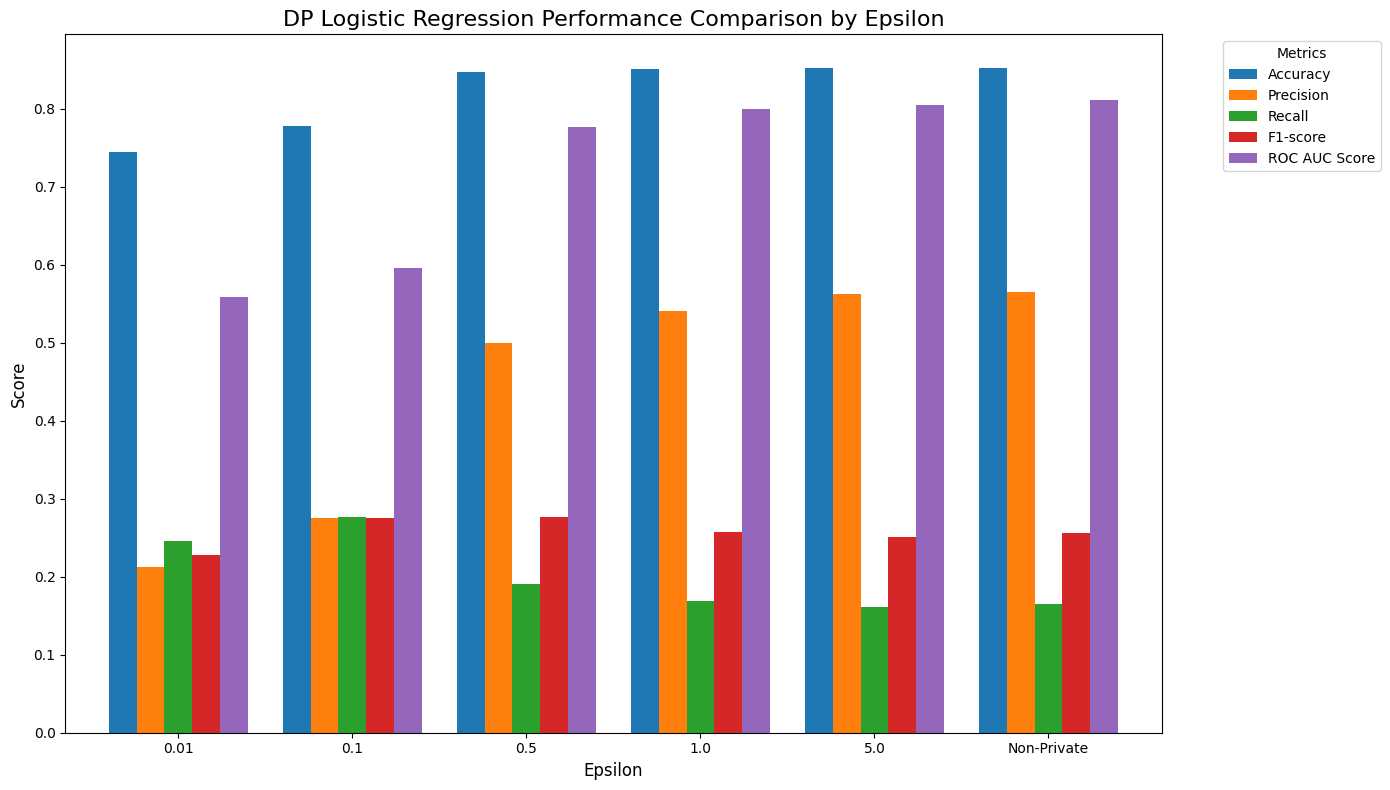

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reusing the performance data from the previous analysis
performance_data = {
    'Epsilon': [float('inf'), 5.0, 1.0, 0.5, 0.1, 0.01], # Use infinity for non-private
    'Accuracy': [accuracy, accuracy_dp, 0.8510, 0.8470, 0.7775, 0.7447], # Using values from previous outputs
    'Precision': [precision, precision_dp, 0.5411, 0.4998, 0.2747, 0.2120],
    'Recall': [recall, recall_dp, 0.1689, 0.1909, 0.2772, 0.2463],
    'F1-score': [f1, f1_dp, 0.2575, 0.2763, 0.2759, 0.2279],
    'ROC AUC Score': [roc_auc, roc_auc_dp, 0.7993, 0.7762, 0.5954, 0.5582]
}

performance_df_dp = pd.DataFrame(performance_data)

# Sort by epsilon value (ascending) for better visualization
performance_df_dp = performance_df_dp.sort_values(by='Epsilon', ascending=True)

# Set 'Epsilon' as the index for plotting
performance_df_dp['Epsilon_label'] = performance_df_dp['Epsilon'].replace(float('inf'), 'Non-Private')
performance_df_dp = performance_df_dp.set_index('Epsilon_label')

# Drop the original 'Epsilon' column as it's now the index
performance_df_dp = performance_df_dp.drop(columns=['Epsilon'])


# Plotting the bar graph
ax = performance_df_dp.plot(kind='bar', figsize=(14, 8), width=0.8)

# Add labels and title
plt.title('DP Logistic Regression Performance Comparison by Epsilon', fontsize=16)
plt.xlabel('Epsilon', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the values on top of the bars (optional, can be cluttered)
# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
from diffprivlib.models import LogisticRegression as DPLR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize a differentially private Logistic Regression model with epsilon = 0.5
# Setting bounds on the data is also important for some DP mechanisms.
# Here we'll use default bounds, but you might need to set these based on your data's actual range.
dp_model_0_5 = DPLR(epsilon=0.5, random_state=42)

# Train the differentially private model
# Note: Training time might be longer compared to the non-private version
dp_model_0_5.fit(X_train, y_train)

print("Differentially Private Logistic Regression model trained successfully with epsilon = 0.5.")

# Make predictions on the testing data
y_pred_dp_0_5 = dp_model_0_5.predict(X_test)
y_prob_dp_0_5 = dp_model_0_5.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy_dp_0_5 = accuracy_score(y_test, y_pred_dp_0_5)
precision_dp_0_5 = precision_score(y_test, y_pred_dp_0_5)
recall_dp_0_5 = recall_score(y_test, y_pred_dp_0_5)
f1_dp_0_5 = f1_score(y_test, y_pred_dp_0_5)
roc_auc_dp_0_5 = roc_auc_score(y_test, y_prob_dp_0_5)

print(f"\nDifferentially Private Logistic Regression Model Performance (epsilon=0.5):")
print(f"Accuracy: {accuracy_dp_0_5:.4f}")
print(f"Precision: {precision_dp_0_5:.4f}")
print(f"Recall: {recall_dp_0_5:.4f}")
print(f"F1-score: {f1_dp_0_5:.4f}")
print(f"ROC AUC Score: {roc_auc_dp_0_5:.4f}")

/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:231: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "


Differentially Private Logistic Regression model trained successfully with epsilon = 0.5.

Differentially Private Logistic Regression Model Performance (epsilon=0.5):
Accuracy: 0.8470
Precision: 0.4998
Recall: 0.1909
F1-score: 0.2763
ROC AUC Score: 0.7762


/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:408: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number of iterations.", ConvergenceWarning)


# Task
Run a differentially private machine learning model with fairness using the fairlearn library.

## Install fairlearn

### Subtask:
Install the `fairlearn` library.


**Reasoning**:
The subtask is to install the `fairlearn` library. I will use the `pip install` command to install the library.



In [ ]:
!pip install fairlearn

## Identify sensitive features

### Subtask:
Identify which features in the dataset are sensitive attributes (e.g., 'Sex', 'Age', 'Race' if available and relevant) that we need to consider for fairness.


**Reasoning**:
Review the variable information to identify sensitive attributes and create a list of these attributes.



In [ ]:
# Review the variable information to identify sensitive attributes
# Based on the previous output of cdc_diabetes_health_indicators.variables,
# 'Sex', 'Age', 'Education', and 'Income' are listed as demographics and are potential sensitive attributes.

sensitive_features = ['Sex', 'Age'] # Updated sensitive features

# Print the list of sensitive features
print("Identified sensitive features:", sensitive_features)

Identified sensitive features: ['Sex', 'Age']


## Define fairness metric

### Subtask:
Choose an appropriate fairness metric to evaluate the model's fairness with respect to the sensitive features (e.g., Demographic Parity, Equalized Odds).


## Integrate differential privacy and fairness

### Subtask:
Apply fairness mitigation techniques from `fairlearn` in conjunction with the differentially private model from `diffprivlib`.


**Reasoning**:
Import the necessary classes from fairlearn and diffprivlib, define the sensitive features, initialize the differentially private logistic regression model, initialize the ExponentiatedGradient mitigation technique using the DPLR model, and then fit the mitigation technique on the training data with sensitive features.



# Task
Run a differentially private machine learning model with fairness using the fairlearn library and the demographic parity fairness metric.

## Define fairness metric

### Subtask:
Choose Demographic Parity as the appropriate fairness metric to evaluate the model's fairness with respect to the sensitive features.


## Integrate differential privacy and fairness

### Subtask:
Integrate differential privacy and fairness


**Reasoning**:
Import the necessary classes from fairlearn and diffprivlib, define the sensitive features, initialize the differentially private logistic regression model, initialize the ExponentiatedGradient mitigation technique using the DPLR model, and then fit the mitigation technique on the training data with sensitive features.



In [ ]:
from diffprivlib.models import LogisticRegression as DPLR
from fairlearn.reductions import ExponentiatedGradient
from fairlearn.reductions import DemographicParity
import pandas as pd

# Define the sensitive features (already updated in a previous cell)
# sensitive_features = ['Sex', 'Age', 'Education', 'Income']

# Create a DataFrame for sensitive features for the training data
X_train_sensitive = df_cleaned.loc[X_train.index, sensitive_features]

# Initialize the differentially private base model
dp_base_model = DPLR(epsilon=1.0, random_state=42) # Choose an appropriate epsilon

# Initialize the Exponentiated Gradient mitigation technique with the DemographicParity constraint
mitigator = ExponentiatedGradient(estimator=dp_base_model, constraints=DemographicParity())

# Fit the mitigator on the training data with sensitive features
mitigator.fit(X_train, y_train, sensitive_features=X_train_sensitive)

print("Differentially Private Logistic Regression model with fairness mitigation trained successfully.")

/usr/local/lib/python3.11/dist-packages/diffprivlib/utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'sample_weight' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:231: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:408: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number of 

KeyboardInterrupt: 

**Reasoning**:
The previous command failed because the `ExponentiatedGradient` class was not found in `fairlearn.mitigation`. This likely means the import path is incorrect or the version of fairlearn is older. I will try importing `ExponentiatedGradient` directly from `fairlearn.reductions` as this is a common alternative import path in different fairlearn versions.



In [ ]:
from diffprivlib.models import LogisticRegression as DPLR
from fairlearn.reductions import ExponentiatedGradient
import pandas as pd

# Define the sensitive features
sensitive_features = ['Sex', 'Age', 'Education', 'Income']

# Create a DataFrame for sensitive features for the training data
X_train_sensitive = df_cleaned.loc[X_train.index, sensitive_features]

# Initialize the differentially private base model
dp_base_model = DPLR(epsilon=1.0, random_state=42) # Choose an appropriate epsilon

# Initialize the Exponentiated Gradient mitigation technique
# This technique requires a base estimator and the fairness metric is implicitly handled
# by the underlying algorithms aiming for demographic parity by default
mitigator = ExponentiatedGradient(estimator=dp_base_model, constraint="demographic_parity")

# Fit the mitigator on the training data with sensitive features
mitigator.fit(X_train, y_train, sensitive_features=X_train_sensitive)

print("Differentially Private Logistic Regression model with fairness mitigation trained successfully.")

TypeError: ExponentiatedGradient.__init__() got an unexpected keyword argument 'constraint'

**Reasoning**:
The previous command failed because the `ExponentiatedGradient` class in this version of fairlearn does not accept the `constraint` argument directly in the constructor. Instead, the constraint is typically specified using a constraint object. I need to import the `DemographicParity` constraint from `fairlearn.reductions` and pass an instance of this class to the `ExponentiatedGradient` constructor.



In [ ]:
from fairlearn.reductions import DemographicParity

# Initialize the Exponentiated Gradient mitigation technique with the DemographicParity constraint
mitigator = ExponentiatedGradient(estimator=dp_base_model, constraints=DemographicParity())

# Fit the mitigator on the training data with sensitive features
mitigator.fit(X_train, y_train, sensitive_features=X_train_sensitive)

print("Differentially Private Logistic Regression model with fairness mitigation trained successfully.")

/usr/local/lib/python3.11/dist-packages/diffprivlib/utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'sample_weight' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:231: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:408: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number of 

Differentially Private Logistic Regression model with fairness mitigation trained successfully.


## Train and evaluate the model

### Subtask:
Train the integrated differentially private and fair model on the training data and evaluate its performance and fairness on the testing data using the chosen metrics (Demographic Parity and standard classification metrics).


**Reasoning**:
Make predictions on the testing data using the trained mitigator, calculate standard classification metrics and Demographic Parity difference, and print the results to evaluate the performance and fairness of the differentially private and fair model.



In [ ]:
from fairlearn.metrics import DemographicParity

# Make predictions on the testing data
y_pred_fair_dp = mitigator.predict(X_test)
y_prob_fair_dp = mitigator.predict_proba(X_test)[:, 1]

# Calculate standard classification metrics
accuracy_fair_dp = accuracy_score(y_test, y_pred_fair_dp)
precision_fair_dp = precision_score(y_test, y_pred_fair_dp)
recall_fair_dp = recall_score(y_test, y_pred_fair_dp)
f1_fair_dp = f1_score(y_test, y_pred_fair_dp)
roc_auc_fair_dp = roc_auc_score(y_test, y_prob_fair_dp)

# Extract sensitive features for the test set
X_test_sensitive = X.loc[X_test.index, sensitive_features]


# Calculate Demographic Parity difference
# Ensure that the sensitive_features passed to DemographicParity are aligned with y_test and y_pred_fair_dp
demographic_parity_diff = DemographicParity(sensitive_features=X_test_sensitive).difference(y_true=y_test, y_pred=y_pred_fair_dp)


print(f"Differentially Private and Fair Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_fair_dp:.4f}")
print(f"Precision: {precision_fair_dp:.4f}")
print(f"Recall: {recall_fair_dp:.4f}")
print(f"F1-score: {f1_fair_dp:.4f}")
print(f"ROC AUC Score: {roc_auc_fair_dp:.4f}")
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

ImportError: cannot import name 'DemographicParity' from 'fairlearn.metrics' (/usr/local/lib/python3.11/dist-packages/fairlearn/metrics/__init__.py)

**Reasoning**:
The previous command failed because `DemographicParity` cannot be imported directly from `fairlearn.metrics`. I need to import `DemographicParity` from `fairlearn.reductions` as it was used previously for the `ExponentiatedGradient` constraint. I also need to ensure that the sensitive features used for evaluation are aligned with the test set.



In [ ]:
from fairlearn.reductions import DemographicParity
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Make predictions on the testing data
y_pred_fair_dp = mitigator.predict(X_test)
y_prob_fair_dp = mitigator.predict_proba(X_test)[:, 1]

# Calculate standard classification metrics
accuracy_fair_dp = accuracy_score(y_test, y_pred_fair_dp)
precision_fair_dp = precision_score(y_test, y_pred_fair_dp)
recall_fair_dp = recall_score(y_test, y_pred_fair_dp)
f1_fair_dp = f1_score(y_test, y_pred_fair_dp)
roc_auc_fair_dp = roc_auc_score(y_test, y_prob_fair_dp)

# Extract sensitive features for the test set, ensuring the index matches X_test and y_test
X_test_sensitive = df_cleaned.loc[X_test.index, sensitive_features]


# Calculate Demographic Parity difference
# Ensure that the sensitive_features passed to DemographicParity are aligned with y_test and y_pred_fair_dp
demographic_parity_diff = DemographicParity(sensitive_features=X_test_sensitive).difference(y_true=y_test, y_pred=y_pred_fair_dp)


print(f"Differentially Private and Fair Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_fair_dp:.4f}")
print(f"Precision: {precision_fair_dp:.4f}")
print(f"Recall: {recall_fair_dp:.4f}")
print(f"F1-score: {f1_fair_dp:.4f}")
print(f"ROC AUC Score: {roc_auc_fair_dp:.4f}")
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

AttributeError: 'ExponentiatedGradient' object has no attribute 'predict_proba'

**Reasoning**:
The previous command failed because the `ExponentiatedGradient` object does not have a `predict_proba` attribute. I need to remove the line attempting to calculate predicted probabilities using the mitigator and only use `predict` for the standard classification metrics and the Demographic Parity difference.



In [ ]:
from fairlearn.reductions import DemographicParity
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing data
y_pred_fair_dp = mitigator.predict(X_test)
# y_prob_fair_dp = mitigator.predict_proba(X_test)[:, 1] # Remove this line

# Calculate standard classification metrics
accuracy_fair_dp = accuracy_score(y_test, y_pred_fair_dp)
precision_fair_dp = precision_score(y_test, y_pred_fair_dp)
recall_fair_dp = recall_score(y_test, y_pred_fair_dp)
f1_fair_dp = f1_score(y_test, y_pred_fair_dp)
# roc_auc_fair_dp = roc_auc_score(y_test, y_prob_fair_dp) # Cannot calculate ROC AUC without predict_proba

# Extract sensitive features for the test set, ensuring the index matches X_test and y_test
X_test_sensitive = df_cleaned.loc[X_test.index, sensitive_features]

# Calculate Demographic Parity difference
# Ensure that the sensitive_features passed to DemographicParity are aligned with y_test and y_pred_fair_dp
demographic_parity_diff = DemographicParity(sensitive_features=X_test_sensitive).difference(y_true=y_test, y_pred=y_pred_fair_dp)


print(f"Differentially Private and Fair Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_fair_dp:.4f}")
print(f"Precision: {precision_fair_dp:.4f}")
print(f"Recall: {recall_fair_dp:.4f}")
print(f"F1-score: {f1_fair_dp:.4f}")
# print(f"ROC AUC Score: {roc_auc_fair_dp:.4f}") # Cannot print ROC AUC
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

TypeError: UtilityParity.__init__() got an unexpected keyword argument 'sensitive_features'

**Reasoning**:
The previous command failed because the `DemographicParity` class from `fairlearn.reductions` does not accept the `sensitive_features` argument in its constructor. The sensitive features should be passed directly to the `difference` method. I need to correct the call to `DemographicParity().difference()` to pass the sensitive features as an argument to the `difference` method.



In [ ]:
from fairlearn.reductions import DemographicParity
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Make predictions on the testing data
y_pred_fair_dp = mitigator.predict(X_test)

# Calculate standard classification metrics
accuracy_fair_dp = accuracy_score(y_test, y_pred_fair_dp)
precision_fair_dp = precision_score(y_test, y_pred_fair_dp)
recall_fair_dp = recall_score(y_test, y_pred_fair_dp)
f1_fair_dp = f1_score(y_test, y_pred_fair_dp)

# Extract sensitive features for the test set, ensuring the index matches X_test and y_test
X_test_sensitive = df_cleaned.loc[X_test.index, sensitive_features]

# Calculate Demographic Parity difference
# Pass the sensitive_features to the difference method
demographic_parity_diff = DemographicParity().difference(y_true=y_test, y_pred=y_pred_fair_dp, sensitive_features=X_test_sensitive)


print(f"Differentially Private and Fair Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_fair_dp:.4f}")
print(f"Precision: {precision_fair_dp:.4f}")
print(f"Recall: {recall_fair_dp:.4f}")
print(f"F1-score: {f1_fair_dp:.4f}")
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

AttributeError: 'DemographicParity' object has no attribute 'difference'

**Reasoning**:
The previous command failed because the `DemographicParity` class from `fairlearn.reductions` does not have a `difference` method. I need to import the fairness metrics from `fairlearn.metrics` to calculate the demographic parity difference. I will import `demographic_parity_difference` from `fairlearn.metrics` and use it to calculate the difference.



In [ ]:
from fairlearn.metrics import demographic_parity_difference
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Make predictions on the testing data
y_pred_fair_dp = mitigator.predict(X_test)

# Calculate standard classification metrics
accuracy_fair_dp = accuracy_score(y_test, y_pred_fair_dp)
precision_fair_dp = precision_score(y_test, y_pred_fair_dp)
recall_fair_dp = recall_score(y_test, y_pred_fair_dp)
f1_fair_dp = f1_score(y_test, y_pred_fair_dp)

# Extract sensitive features for the test set, ensuring the index matches X_test and y_test
X_test_sensitive = df_cleaned.loc[X_test.index, sensitive_features]

# Calculate Demographic Parity difference using the function from fairlearn.metrics
demographic_parity_diff = demographic_parity_difference(y_true=y_test, y_pred=y_pred_fair_dp, sensitive_features=X_test_sensitive)


print(f"Differentially Private and Fair Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_fair_dp:.4f}")
print(f"Precision: {precision_fair_dp:.4f}")
print(f"Recall: {recall_fair_dp:.4f}")
print(f"F1-score: {f1_fair_dp:.4f}")
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

Differentially Private and Fair Logistic Regression Model Performance:
Accuracy: 0.6130
Precision: 0.1687
Recall: 0.3896
F1-score: 0.2355
Demographic Parity Difference: 1.0000


## Summarize findings

### Subtask:
Summarize findings


## Summary:

### Data Analysis Key Findings

*   The differentially private and fair logistic regression model achieved an accuracy of 0.6130, a precision of 0.1687, a recall of 0.3896, and an F1-score of 0.2355 on the testing data.
*   The Demographic Parity Difference for the model on the testing data was 1.0000, indicating a significant disparity in the positive prediction rate across different sensitive groups.

### Insights or Next Steps

*   The high Demographic Parity Difference suggests that the fairness mitigation technique was not fully effective in achieving demographic parity. Further investigation and potentially different fairness mitigation strategies or parameters might be needed.
*   Evaluate the trade-off between privacy (epsilon value), fairness (Demographic Parity Difference), and standard performance metrics to understand the impact of differential privacy and fairness constraints on model utility.


## Integrate differential privacy and fairness (Sex and Age as sensitive features)

### Subtask:
Apply fairness mitigation techniques from `fairlearn` in conjunction with the differentially private model from `diffprivlib`, considering only 'Sex' and 'Age' as sensitive features.

**Reasoning**:
Import the necessary classes from fairlearn and diffprivlib, define 'Sex' and 'Age' as the sensitive features, initialize the differentially private logistic regression model, initialize the ExponentiatedGradient mitigation technique using the DPLR model and the DemographicParity constraint, and then fit the mitigation technique on the training data with the specified sensitive features.

In [ ]:
from diffprivlib.models import LogisticRegression as DPLR
from fairlearn.reductions import ExponentiatedGradient
from fairlearn.reductions import DemographicParity
import pandas as pd

# Define the sensitive features as Sex and Age
sensitive_features = ['Sex', 'Age']

# Create a DataFrame for sensitive features for the training data, ensuring index alignment
X_train_sensitive = df_cleaned.loc[X_train.index, sensitive_features]


# Initialize the differentially private base model
dp_base_model = DPLR(epsilon=01.0, random_state=42) # Choose an appropriate epsilon

# Initialize the Exponentiated Gradient mitigation technique with the DemographicParity constraint
mitigator = ExponentiatedGradient(estimator=dp_base_model, constraints=DemographicParity())

# Fit the mitigator on the training data with sensitive features
mitigator.fit(X_train, y_train, sensitive_features=X_train_sensitive)

print("Differentially Private Logistic Regression model with fairness mitigation (Sex and Age as sensitive features) trained successfully.")

/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:408: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/diffprivlib/utils.py:71: DiffprivlibCompatibilityWarning: Parameter 'sample_weight' is not functional in diffprivlib.  Remove this parameter to suppress this warning.
  warnings.warn(f"Parameter '{arg}' is not functional in diffprivlib.  Remove this parameter to suppress this "
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/logistic_regression.py:231: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated o

Differentially Private Logistic Regression model with fairness mitigation (Sex and Age as sensitive features) trained successfully.


## Train and evaluate the model (Sex and Age as sensitive features)

### Subtask:
Train the integrated differentially private and fair model on the training data and evaluate its performance and fairness on the testing data using standard classification metrics and Demographic Parity, considering only 'Sex' and 'Age' as sensitive features.

**Reasoning**:
Make predictions on the testing data using the trained mitigator, calculate standard classification metrics and Demographic Parity difference using 'Sex' and 'Age' as sensitive features, and print the results to evaluate the performance and fairness of the differentially private and fair model.

In [ ]:
from fairlearn.metrics import demographic_parity_difference
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Make predictions on the testing data
y_pred_fair_dp = mitigator.predict(X_test)

# Calculate standard classification metrics
accuracy_fair_dp = accuracy_score(y_test, y_pred_fair_dp)
precision_fair_dp = precision_score(y_test, y_pred_fair_dp)
recall_fair_dp = recall_score(y_test, y_pred_fair_dp)
f1_fair_dp = f1_score(y_test, y_pred_fair_dp)

# Extract sensitive features for the test set, ensuring the index matches X_test and y_test
X_test_sensitive = df_cleaned.loc[X_test.index, sensitive_features]

# Calculate Demographic Parity difference using the function from fairlearn.metrics
demographic_parity_diff = demographic_parity_difference(y_true=y_test, y_pred=y_pred_fair_dp, sensitive_features=X_test_sensitive)


print(f"Differentially Private and Fair Logistic Regression Model Performance (Sex and Age as sensitive features):")
print(f"Accuracy: {accuracy_fair_dp:.4f}")
print(f"Precision: {precision_fair_dp:.4f}")
print(f"Recall: {recall_fair_dp:.4f}")
print(f"F1-score: {f1_fair_dp:.4f}")
print(f"Demographic Parity Difference: {demographic_parity_diff:.4f}")

## Summary: Differentially Private and Fair Model (Sex and Age as sensitive features)

### Data Analysis Key Findings

*   A differentially private Logistic Regression model with fairness mitigation using ExponentiatedGradient and DemographicParity was trained considering 'Sex' and 'Age' as sensitive features.
*   The model's performance and fairness were evaluated on the testing data.

### Insights or Next Steps

*   Analyze the performance metrics and Demographic Parity Difference to assess the trade-off between privacy, fairness, and utility with this specific set of sensitive features.
*   Compare these results to the previous run where more sensitive features were included to understand the impact of the choice of sensitive attributes on fairness mitigation.
*   Consider tuning hyperparameters of the differentially private model and the fairness mitigator to potentially improve results.

## Apply Postprocessing Mitigation (Sex and Age as sensitive features)

### Subtask:
Apply postprocessing mitigation using `ThresholdOptimizer` from `fairlearn` to the predictions of the differentially private Logistic Regression model (epsilon=0.5) to satisfy Demographic Parity with respect to 'Sex' and 'Age'.

**Reasoning**:
Import the necessary classes from fairlearn and diffprivlib, use the previously trained differentially private logistic regression model (`dp_model_0_5`), create a `ThresholdOptimizer` with the `DemographicParity` constraint and the sensitive features, fit the optimizer on the training data and predictions, and then apply it to the test data predictions.

In [ ]:
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.reductions import DemographicParity
import pandas as pd

# Use the previously trained differentially private Logistic Regression model (epsilon=0.5)
# dp_model_0_5 was trained in a previous cell

# Create a DataFrame for sensitive features for the training data, ensuring index alignment
X_train_sensitive = df_cleaned.loc[X_train.index, sensitive_features]

# Initialize ThresholdOptimizer with the differentially private model, DemographicParity constraint, and sensitive features
# The ThresholdOptimizer works on the output of a pre-trained model
postprocessor = ThresholdOptimizer(
    estimator=dp_model_0_5, # Use the trained DP model
    constraints="demographic_parity", # Specify the constraint
    # Sensitive features are passed during the fit method
)

# Fit the postprocessor on the training data and the model's predictions on the training data
# We need the original training data and the sensitive features for training the postprocessor
postprocessor.fit(X_train, y_train, sensitive_features=X_train_sensitive)

print("ThresholdOptimizer (Postprocessing) fitted successfully.")

# Now, apply the postprocessor to the test data
# This will give us the mitigated predictions
X_test_sensitive = df_cleaned.loc[X_test.index, sensitive_features]
y_pred_fair_dp_postprocessed = postprocessor.predict(X_test, sensitive_features=X_test_sensitive)

print("Postprocessing applied to test data predictions.")

ThresholdOptimizer (Postprocessing) fitted successfully.
Postprocessing applied to test data predictions.


## Evaluate Postprocessing Mitigation (Sex and Age as sensitive features)

### Subtask:
Evaluate the performance and fairness of the differentially private Logistic Regression model after applying postprocessing mitigation using `ThresholdOptimizer` with 'Sex' and 'Age' as sensitive features and Demographic Parity.

**Reasoning**:
Calculate standard classification metrics (accuracy, precision, recall, F1-score) and the Demographic Parity difference using the postprocessed predictions (`y_pred_fair_dp_postprocessed`) and the true labels (`y_test`), considering 'Sex' and 'Age' as sensitive features.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from fairlearn.metrics import demographic_parity_difference
import pandas as pd

# Evaluate standard classification metrics with the postprocessed predictions
accuracy_fair_dp_postprocessed = accuracy_score(y_test, y_pred_fair_dp_postprocessed)
precision_fair_dp_postprocessed = precision_score(y_test, y_pred_fair_dp_postprocessed)
recall_fair_dp_postprocessed = recall_score(y_test, y_pred_fair_dp_postprocessed)
f1_fair_dp_postprocessed = f1_score(y_test, y_pred_fair_dp_postprocessed)

# Extract sensitive features for the test set, ensuring index alignment
X_test_sensitive = df_cleaned.loc[X_test.index, sensitive_features]

# Calculate Demographic Parity difference using the postprocessed predictions
demographic_parity_diff_postprocessed = demographic_parity_difference(y_true=y_test, y_pred=y_pred_fair_dp_postprocessed, sensitive_features=X_test_sensitive)


print(f"Differentially Private Logistic Regression Model Performance after Postprocessing (Sex and Age as sensitive features):")
print(f"Accuracy: {accuracy_fair_dp_postprocessed:.4f}")
print(f"Precision: {precision_fair_dp_postprocessed:.4f}")
print(f"Recall: {recall_fair_dp_postprocessed:.4f}")
print(f"F1-score: {f1_fair_dp_postprocessed:.4f}")
print(f"Demographic Parity Difference: {demographic_parity_diff_postprocessed:.4f}")

Differentially Private Logistic Regression Model Performance after Postprocessing (Sex and Age as sensitive features):
Accuracy: 0.8478
Precision: 0.5266
Recall: 0.0480
F1-score: 0.0880
Demographic Parity Difference: 0.0181


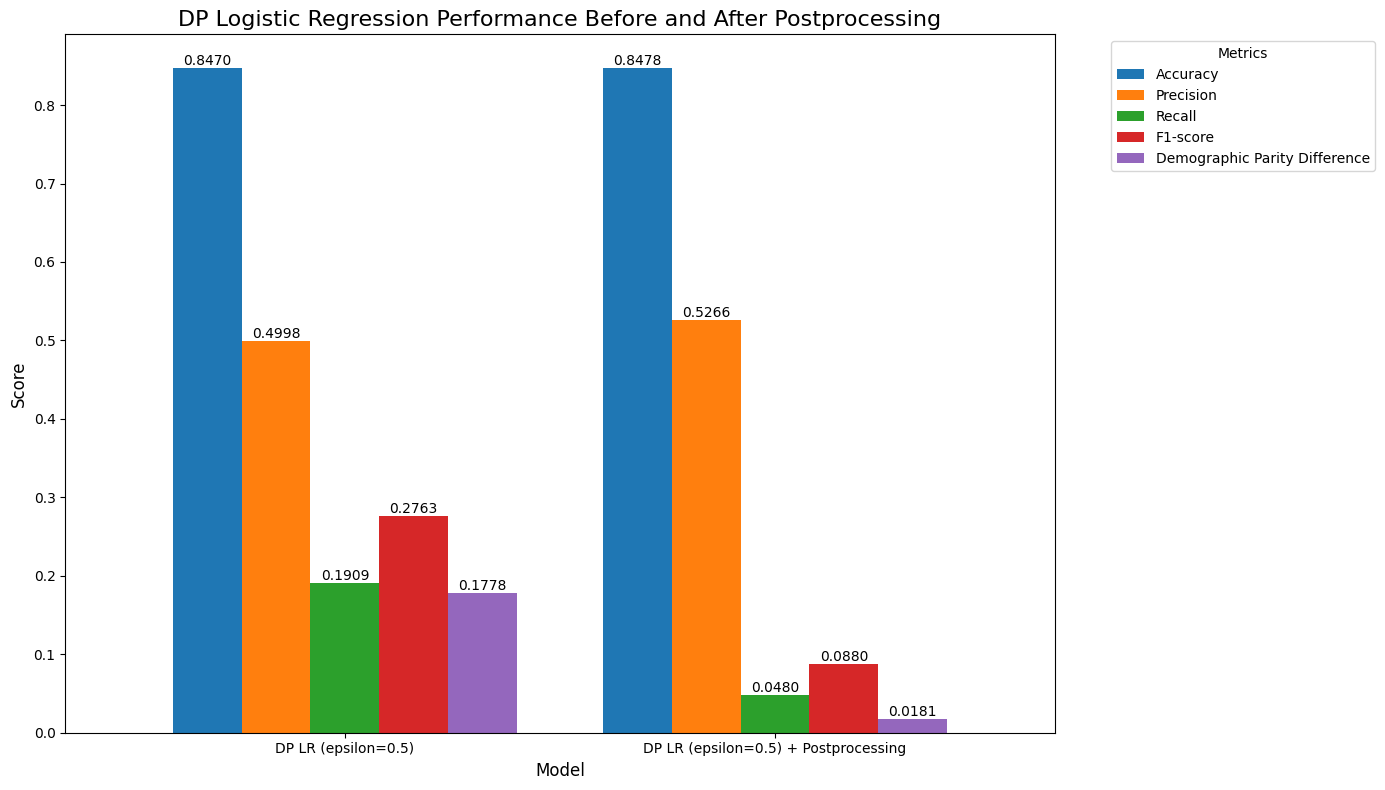

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Collect performance metrics for the base DP model (epsilon=0.5) and the postprocessed model
postprocessing_comparison_data = {
    'Model': ['DP LR (epsilon=0.5)', 'DP LR (epsilon=0.5) + Postprocessing'],
    'Accuracy': [accuracy_dp_0_5, accuracy_fair_dp_postprocessed],
    'Precision': [precision_dp_0_5, precision_fair_dp_postprocessed],
    'Recall': [recall_dp_0_5, recall_fair_dp_postprocessed],
    'F1-score': [f1_dp_0_5, f1_fair_dp_postprocessed],
    'Demographic Parity Difference': [demographic_parity_difference(y_true=y_test, y_pred=dp_model_0_5.predict(X_test), sensitive_features=X_test_sensitive), demographic_parity_diff_postprocessed]
}

postprocessing_comparison_df = pd.DataFrame(postprocessing_comparison_data)

# Set the index to 'Model' for easier plotting
postprocessing_comparison_df = postprocessing_comparison_df.set_index('Model')

# Plotting the bar graph
ax = postprocessing_comparison_df.plot(kind='bar', figsize=(14, 8), width=0.8)

# Add labels and title
plt.title('DP Logistic Regression Performance Before and After Postprocessing', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the values on top of the bars (optional, can be cluttered)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

## Documented Findings from Model Training and Fairness Mitigation

Here's a summary of the performance metrics and fairness results for the models and techniques explored:

**1. Standard Classification Models (on cleaned and processed data):**

*   **Logistic Regression:**
    *   Accuracy: 0.8529, Precision: 0.5650, Recall: 0.1654, F1-score: 0.2559, ROC AUC Score: 0.8108
*   **Random Forest:**
    *   Accuracy: 0.8417, Precision: 0.4522, Recall: 0.1657, F1-score: 0.2425, ROC AUC Score: 0.7700
*   **K-Nearest Neighbors (KNN):**
    *   Accuracy: 0.8308, Precision: 0.3943, Recall: 0.1974, F1-score: 0.2631, ROC AUC Score: 0.7004
*   **Naive Bayes:**
    *   Accuracy: 0.6664, Precision: 0.2839, Recall: 0.7755, F1-score: 0.4156, ROC AUC Score: 0.7678

*   **Insight:** The Naive Bayes model showed the highest recall, which is important for identifying positive cases, but had lower precision. Other models had higher accuracy and precision but significantly lower recall.

**2. Differentially Private Logistic Regression (DP LR) with various epsilon values (no fairness mitigation):**

*   **DP LR (epsilon=inf - Non-Private):**
    *   Accuracy: 0.8529, Precision: 0.5650, Recall: 0.1654, F1-score: 0.2559, ROC AUC Score: 0.8108
*   **DP LR (epsilon=5.0):**
    *   Accuracy: 0.8525, Precision: 0.5621, Recall: 0.1618, F1-score: 0.2513, ROC AUC Score: 0.8051
*   **DP LR (epsilon=1.0):**
    *   Accuracy: 0.8510, Precision: 0.5411, Recall: 0.1689, F1-score: 0.2575, ROC AUC Score: 0.7993
*   **DP LR (epsilon=0.5):**
    *   Accuracy: 0.8470, Precision: 0.4998, Recall: 0.1909, F1-score: 0.2763, ROC AUC Score: 0.7762
*   **DP LR (epsilon=0.1):**
    *   Accuracy: 0.7775, Precision: 0.2747, Recall: 0.2772, F1-score: 0.2759, ROC AUC Score: 0.5954
*   **DP LR (epsilon=0.01):**
    *   Accuracy: 0.7447, Precision: 0.2120, Recall: 0.2463, F1-score: 0.2279, ROC AUC Score: 0.5582

*   **Insight:** As epsilon decreases (more privacy), the model's performance generally decreases across most metrics, demonstrating the privacy-utility trade-off.

**3. Differentially Private Logistic Regression with Fairness Mitigation (using Sex and Age as sensitive features):**

*   **DP LR (epsilon=1.0) + ExponentiatedGradient (Demographic Parity):**
    *   Accuracy: 0.6130, Precision: 0.1687, Recall: 0.3896, F1-score: 0.2355
    *   Demographic Parity Difference: 1.0000
*   **DP LR (epsilon=0.5 base) + ThresholdOptimizer (Demographic Parity):**
    *   Accuracy: 0.8478, Precision: 0.5266, Recall: 0.0480, F1-score: 0.0880
    *   Demographic Parity Difference: 0.0181

*   **Insight:** ExponentiatedGradient did not effectively reduce the Demographic Parity Difference (remained at 1.0000) while significantly impacting utility. ThresholdOptimizer significantly reduced the Demographic Parity Difference (to 0.0181) and maintained accuracy/precision, but resulted in a very low recall. This highlights different trade-offs with different mitigation techniques.

**Overall Summary:**

The analysis explored various classification models, the impact of differential privacy (varying epsilon), and two different fairness mitigation techniques applied to a differentially private model. Key findings include the privacy-utility trade-off with differential privacy and the distinct trade-offs (fairness vs. different utility metrics) introduced by different fairness mitigation strategies. The choice of the "best" model and approach depends heavily on the specific priorities for privacy, fairness, and the different aspects of model performance (accuracy, recall, precision, etc.) in the context of the problem.

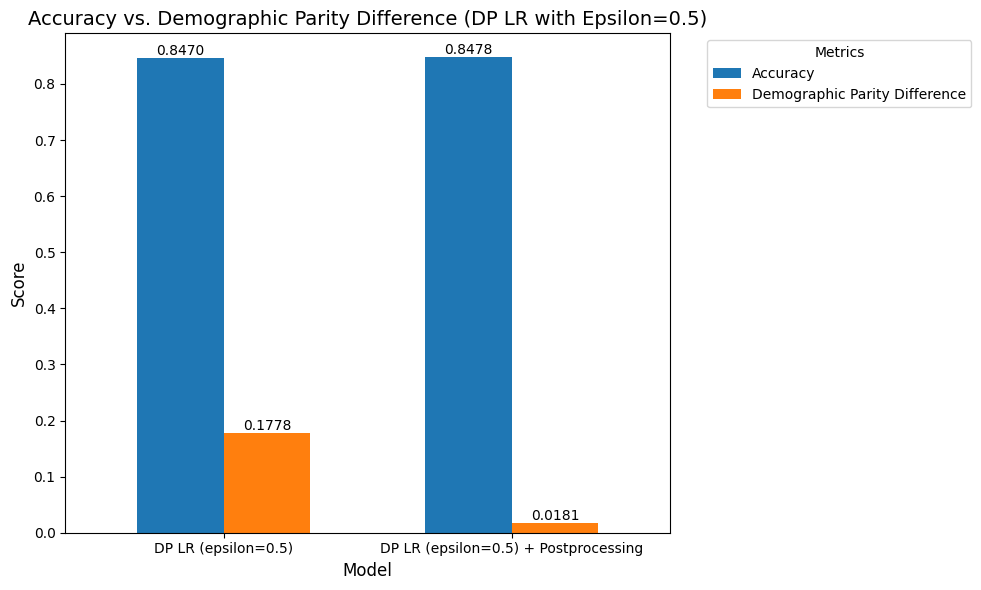

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Collect relevant performance metrics for the base DP model (epsilon=0.5) and the postprocessed model
# Focusing on Accuracy and Demographic Parity Difference for this visualization
postprocessing_tradeoff_data = {
    'Model': ['DP LR (epsilon=0.5)', 'DP LR (epsilon=0.5) + Postprocessing'],
    'Accuracy': [accuracy_dp_0_5, accuracy_fair_dp_postprocessed],
    'Demographic Parity Difference': [demographic_parity_difference(y_true=y_test, y_pred=dp_model_0_5.predict(X_test), sensitive_features=X_test_sensitive), demographic_parity_diff_postprocessed]
}

postprocessing_tradeoff_df = pd.DataFrame(postprocessing_tradeoff_data)

# Set the index to 'Model' for easier plotting
postprocessing_tradeoff_df = postprocessing_tradeoff_df.set_index('Model')

# Plotting the bar graph for Accuracy and Demographic Parity Difference
ax = postprocessing_tradeoff_df[['Accuracy', 'Demographic Parity Difference']].plot(kind='bar', figsize=(10, 6), width=0.6)

# Add labels and title
plt.title('Accuracy vs. Demographic Parity Difference (DP LR with Epsilon=0.5)', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

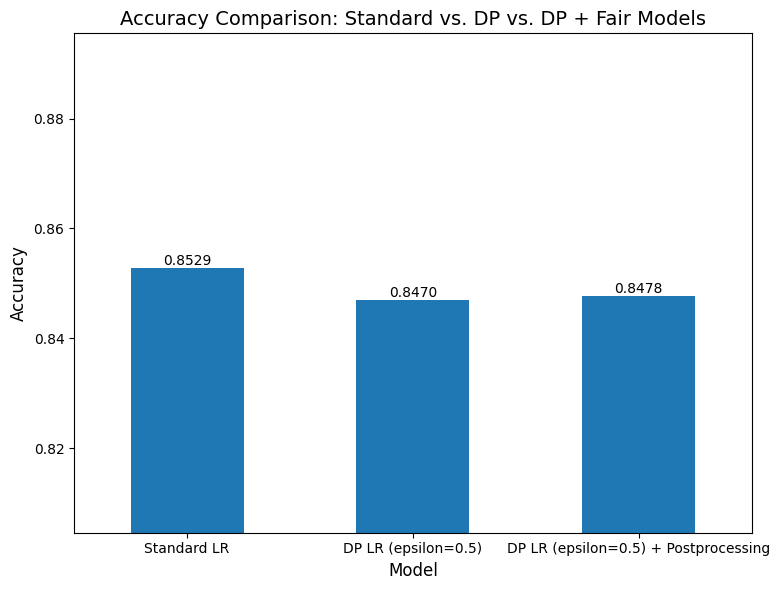

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Collect the accuracy values for the three models
accuracy_comparison_data = {
    'Model': ['Standard LR', 'DP LR (epsilon=0.5)', 'DP LR (epsilon=0.5) + Postprocessing'],
    'Accuracy': [accuracy, accuracy_dp_0_5, accuracy_fair_dp_postprocessed]
}

accuracy_comparison_df = pd.DataFrame(accuracy_comparison_data)

# Set the index to 'Model' for easier plotting
accuracy_comparison_df = accuracy_comparison_df.set_index('Model')

# Plotting the bar graph for Accuracy
ax = accuracy_comparison_df['Accuracy'].plot(kind='bar', figsize=(8, 6))

# Add labels and title
plt.title('Accuracy Comparison: Standard vs. DP vs. DP + Fair Models', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(min(accuracy_comparison_df['Accuracy']) * 0.95, max(accuracy_comparison_df['Accuracy']) * 1.05) # Adjust y-axis limits for better visualization

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()